# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [150]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames



# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [151]:
# The total number of records
data.shape

(45222, 14)

In [152]:
# The number of individuals making more than $50000 annually
data['income'].value_counts()

income
<=50K    34014
>50K     11208
Name: count, dtype: int64

In [153]:
# The number of individuals making at most $50000 annually
data['income'].value_counts()

income
<=50K    34014
>50K     11208
Name: count, dtype: int64

In [154]:
# The percentage of individuals making at more than $50000 annually
data['income'].value_counts(normalize=True)

income
<=50K    0.752156
>50K     0.247844
Name: proportion, dtype: float64

### Exercise 2 Preprocessing 

C:\Users\Wiman\AppData\Local\Temp\ipykernel_19684\2635501248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-gain'], ax=axes[0])
C:\Users\Wiman\AppData\Local\Temp\ipykernel_19684\2635501248.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-loss'], ax=axes[1])


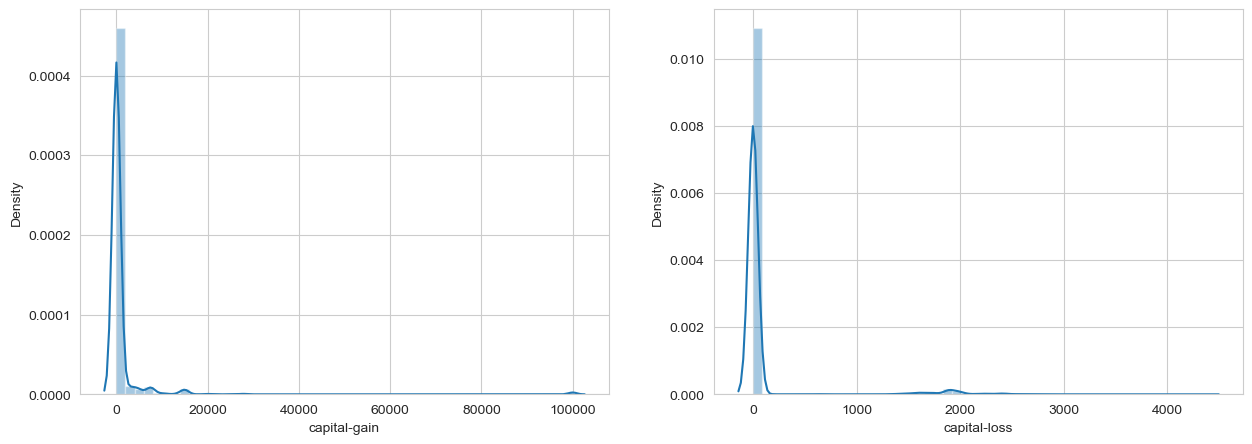

In [155]:
# Visualize skewed continuous features of original data
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['capital-gain'], ax=axes[0])
sns.distplot(data['capital-loss'], ax=axes[1])

# print("ori gain kurt: {}".format(data['capital-gain'].kurt()))
# print("ori loss kurt: {}".format(data['capital-loss'].kurt()))


plt.show()

In [156]:
# Outliers Treatment
import scipy.stats as stats
data['gz'] = stats.zscore(data['capital-gain'])
data['lz'] = stats.zscore(data['capital-loss'])
data = data[(data['gz'] > -3) & (data['gz'] < 3) & (data['lz'] > -3) & (data['lz'] < 3)].reset_index()


data['capital-gain'] = np.log(data['capital-gain'] + 1)
data['capital-loss'] = np.log(data['capital-loss'] + 1)

# data['capital-gain'] = np.sqrt(data['capital-gain'] + 1)
# data['capital-loss'] = np.sqrt(data['capital-loss'] + 1)


print("gain kurt: {}".format(data['capital-gain'].kurt()))
print("loss kurt: {}".format(data['capital-loss'].kurt()))

gain kurt: 7.746106087738881
loss kurt: 691.6931849196312


In [157]:
# Data Transformation
data['age'] = data['age'].astype('float64')

print("gain kurt: {}".format(data['capital-gain'].kurt()))
print("loss kurt: {}".format(data['capital-loss'].kurt()))

data['gz'] = stats.zscore(data['capital-gain'])
data['lz'] = stats.zscore(data['capital-loss'])

print("gz kurt: {}".format(data['gz'].kurt()))
print("lz kurt: {}".format(data['lz'].kurt()))

# Perform one-hot encoding on the data
data = pd.get_dummies(data, columns=['workclass','education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)
data['income'] = data['income'] == '>50K'
data = data.drop('index', axis=1)
data.dtypes



gain kurt: 7.746106087738881
loss kurt: 691.6931849196312
gz kurt: 7.7461060877388865
lz kurt: 691.6931849196307


age                                float64
education-num                      float64
capital-gain                       float64
capital-loss                       float64
hours-per-week                     float64
                                    ...   
native-country_ Thailand              bool
native-country_ Trinadad&Tobago       bool
native-country_ United-States         bool
native-country_ Vietnam               bool
native-country_ Yugoslavia            bool
Length: 97, dtype: object

### Exercise 3 Shuffle and Split Data

In [158]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split

Y = data['income']
X = data.drop('income', axis=1)
print(Y.dtypes)
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

bool


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

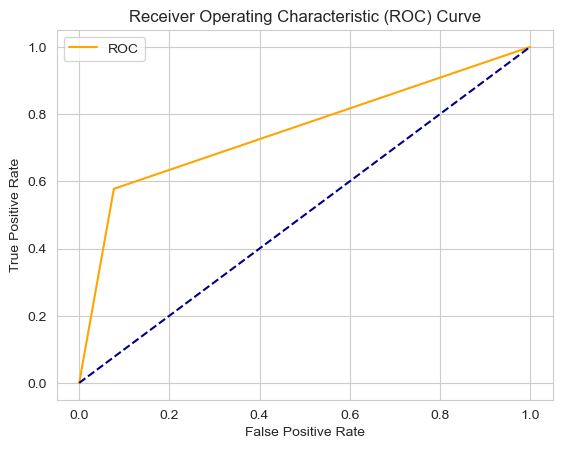

0.8449865763978055


In [162]:
# Evaluating Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import metrics


# model = LinearSVC()
# model.fit(X_train, y_train)
# fper, tper, thresholds = metrics.roc_curve(y_test, model.predict(X_test))
# plt.plot(fper, tper, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# fper, tper, thresholds = metrics.roc_curve(y_test, model.predict(X_test))
# plt.plot(fper, tper, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()
#
model = RandomForestClassifier()
model.fit(X_train, y_train)
fper, tper, thresholds = metrics.roc_curve(y_test, model.predict(X_test))
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [160]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

sim = np.ones((8567, 1))
print(metrics.accuracy_score(y_test, sim))
print(metrics.f1_score(y_test, sim))


0.22610015174506828
0.3688118811881188


### Exercise 5 Evaluating Model 

## Question:
### Q1: